In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
tf.compat.v1.enable_eager_execution()
from tensorflow.keras.layers import Dense,Dropout,SimpleRNN,LSTM
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D2-Conrad/S3/Office_Conrad-S3.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:5760]
test_data = df.iloc[5760:]

In [5]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
        #print(y)
   
    
    return [X, y]

In [6]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [8]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [9]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [10]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [11]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (5736, 24, 1)
y_train.shape =  (5736,)
X_test.shape =  (696, 24, 1)
y_test.shape =  (696,)


In [12]:
rnn_model = Sequential()

rnn_model.add(SimpleRNN(24,activation="tanh",return_sequences=False, input_shape=(X_train.shape[1],1)))

rnn_model.add(Dense(1))

rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 24)                624       
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 649
Trainable params: 649
Non-trainable params: 0
_________________________________________________________________


In [13]:
rnn_model.compile(optimizer="adam",loss="MSE")
rnn_model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
45/45 [==============================] - 1s 6ms/step - loss: 84.2282
Epoch 2/300
45/45 [==============================] - 0s 6ms/step - loss: 47.2241
Epoch 3/300
45/45 [==============================] - 0s 6ms/step - loss: 23.8725
Epoch 4/300
45/45 [==============================] - 0s 6ms/step - loss: 14.0450
Epoch 5/300
45/45 [==============================] - 0s 5ms/step - loss: 10.3695
Epoch 6/300
45/45 [==============================] - 0s 6ms/step - loss: 8.2928
Epoch 7/300
45/45 [==============================] - 0s 6ms/step - loss: 7.0122
Epoch 8/300
45/45 [==============================] - 0s 6ms/step - loss: 6.2087
Epoch 9/300
45/45 [==============================] - 0s 6ms/step - loss: 5.4288
Epoch 10/300
45/45 [==============================] - 0s 6ms/step - loss: 4.6003
Epoch 11/300
45/45 [==============================] - 0s 5ms/step - loss: 3.8352
Epoch 12/300
45/45 [==============================] - 0s 5ms/step - loss: 3.3046
Epoch 13/300
45/45 [============

In [14]:
rnn_train_prediction=rnn_model.predict(X_train)
rnn_test_prediction=rnn_model.predict(X_test)

In [15]:
from sklearn.metrics import mean_absolute_error
rnn_mae_train=mean_absolute_error(y_train, rnn_train_prediction)
rnn_mae_test=mean_absolute_error(y_test, rnn_test_prediction)

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

In [17]:
rnn_rmse_train = sqrt(mean_squared_error(y_train, rnn_train_prediction))
rnn_rmse_test = sqrt(mean_squared_error(y_test, rnn_test_prediction))
mape_train = mean_absolute_percentage_error(y_train, rnn_train_prediction)
mape_test = mean_absolute_percentage_error(y_test, rnn_test_prediction)

In [18]:
print('Root Mean Squared Error for RNN Model for training is:',rnn_rmse_train)
print('Root Mean Squared Error for RNN Model for testing is:',rnn_rmse_test)
print('Mean Absolute Error for RNN Model for training is:',rnn_mae_train)
print('Mean Absolute Error for RNN Model for testing is:',rnn_mae_test)
print('MAPE for RNN Model for training is:',mape_train)
print('MAPE for RNN Model for testing is:',mape_test)

Root Mean Squared Error for RNN Model for training is: 0.9460797277820575
Root Mean Squared Error for RNN Model for testing is: 0.7800498974769123
Mean Absolute Error for RNN Model for training is: 0.6950454585953566
Mean Absolute Error for RNN Model for testing is: 0.5451643357343213
MAPE for RNN Model for training is: 0.07438559411641485
MAPE for RNN Model for testing is: 0.0662089444965307


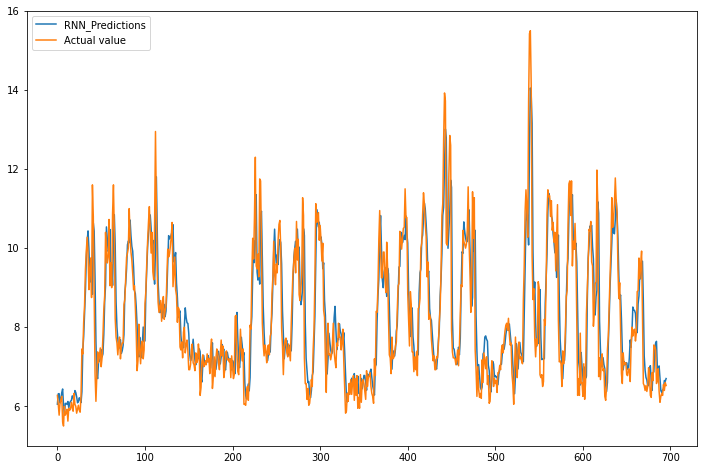

In [19]:
pred=rnn_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='RNN_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [20]:
y_test=y_test.reshape(-1,1)

y_test[0],rnn_test_prediction[0]

(array([6.2750001]), array([6.0525804], dtype=float32))

In [21]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-rnn_test_prediction[i])
    
print(d1)

[array([0.22241974]), array([-0.26447105]), array([-0.5448494]), array([-0.00998354]), array([-0.01348639]), array([-0.09805822]), array([-0.8371582]), array([-0.52472162]), array([0.21248388]), array([-0.29745674]), array([-0.24726772]), array([-0.12315035]), array([-0.49621248]), array([-0.00629854]), array([-0.17966175]), array([-0.20055342]), array([-0.04830599]), array([-0.28773212]), array([-0.35634565]), array([0.20491981]), array([-0.34678078]), array([-0.35035086]), array([-0.41537142]), array([-0.16276407]), array([-0.09174156]), array([-0.31537533]), array([-0.31687403]), array([0.18067026]), array([1.08130598]), array([-0.09203863]), array([0.3669734]), array([0.25884628]), array([0.55844879]), array([0.19817734]), array([0.0952692]), array([-0.58558655]), array([-1.03882313]), array([0.24880886]), array([0.60618401]), array([-0.60708523]), array([2.76808357]), array([0.16592121]), array([-1.50558472]), array([-2.39471626]), array([-1.51896]), array([-0.02181673]), array([0

In [22]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([3.61945725]), array([-4.13202]))

In [23]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [24]:
len(neg),len(pos)

(398, 298)